In [112]:
import sys
sys.path.append('../../../../PhD_projects/utils/')
from cmptTheoreticalEmitGrowth import *
from bunchLengthConversions import *
from coordinatesConversions import *
from cmpt_TuneSpreads import *

import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [113]:
params = {'legend.fontsize': 20,
          'figure.figsize': (9.5, 8.5),
          'axes.labelsize': 27,
          'axes.titlesize': 23,
          'xtick.labelsize': 27,
          'ytick.labelsize': 27,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 10,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

#### 1) Load the data
a) Give the paths to the data folder

b) Load the values of the transverse emittances in lists.

In [114]:
n_sets = 10
n_runs = 3 # number of runs that the simulation was repeated
n_turns = int(1e5)            # number of cycles to run the simulation for
decTurns = int(100)           # how often to record data
circumference  = 6911.5623 # [m]
f_rev  = 299792458/circumference  # [Hz] The revolution frequency of the machine 
separationTime = 1 / f_rev * decTurns #There are decTurns revolutions before each recording of data
tspan = (np.arange(n_turns / decTurns) + 1.0) * separationTime #total time spanned by the simulation

In [146]:
path_to_data = '/afs/cern.ch/work/n/natriant/private/pyheadtail_example_crabcavity/'
study_name = 'sps_270GeV_WakesOFF_ayy1500_QpxQpy1_Nb5e5_IPACvalues_coast1_setting2_AN'

In [147]:
my_variables = [1500] # ayy 1/m 

### Load the data, and for each Set average over the three runs

In [148]:
ex_mean_dict, ey_mean_dict = {}, {} # type: dictionary
ex_std_dict, ey_std_dict = {}, {} # type: dictionary


for var in my_variables:
    print(var)
    for my_set in range(n_sets):
        #print(var, my_set)
        temp_name = f'{var}_set{my_set}'
        ex_mean, ey_mean = [], []
        for run in range(n_runs):
            try: # test if file doesn't exist
                meanX, meanY, meanXsq, meanYsq, emitX, emitY = np.loadtxt(path_to_data+f'{study_name}NoiseKicksSet{my_set}_run{run}/file.txt', delimiter = ",", unpack = True)
                # B1. Create a different list for each run and save the emittance values
                ex_mean.append(emitX)
                ey_mean.append(emitY)
            except OSError as err:
                print("OS error: {0}".format(err))
                #ex_dict[temp_name] = np.zeros(len(tspan)) 
                #ey_dict[temp_name] = np.zeros(len(tspan))
        ex_mean_dict[temp_name] = np.mean(ex_mean, axis=0)
        ey_mean_dict[temp_name] = np.mean(ey_mean, axis=0)
        ex_std_dict[temp_name] = np.std(ex_mean, axis=0)
        ey_std_dict[temp_name] = np.std(ey_mean, axis=0)    
        

1500


In [149]:
### Plot the average emittance growth over the N(=10) sets for each acquisition (turn). The shaded area will show the std over the N(=10) sets

In [150]:
dict_keys = list(ey_mean_dict.keys())
print(dict_keys)

['1500_set0', '1500_set1', '1500_set2', '1500_set3', '1500_set4', '1500_set5', '1500_set6', '1500_set7', '1500_set8', '1500_set9']


In [151]:
ey_mean, ey_std = [], [] # list with the averaged emittance growth over the sets for each acquisition (turn)
ex_mean, ex_std = [], []
for turn in range(len(ey_mean_dict[dict_keys[0]])):
    temp_y, temp_x = [], [] # append the emittance value from all the sets for each acquisition
    
    for my_set in range(n_sets):
        temp_y.append(ey_mean_dict[dict_keys[my_set]][turn])
        temp_x.append(ex_mean_dict[dict_keys[my_set]][turn])
        
    ey_mean.append(np.mean(temp_y))
    ey_std.append(np.std(temp_y))
         
    ex_mean.append(np.mean(temp_x))
    ex_std.append(np.std(temp_x))

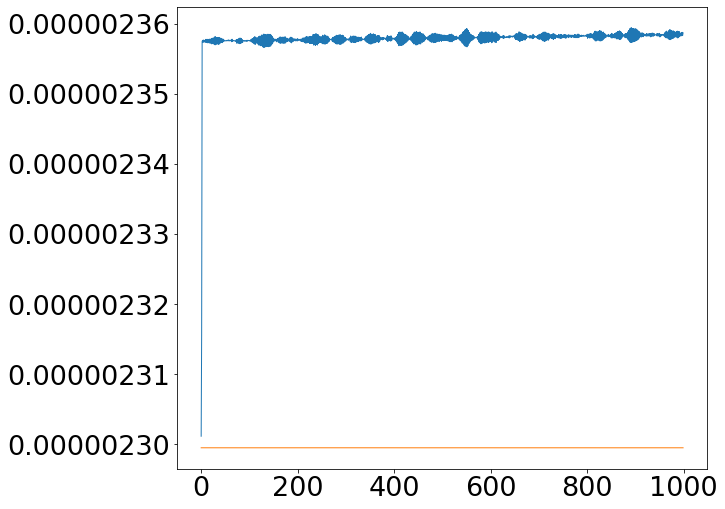

In [152]:
plt.plot(ey_mean)
plt.plot(ex_mean)


### Format the computed growth rates in a Data Frame

In [153]:
data = {'ey mean':[ey_mean], 'ey std':[ey_std], 'ex mean':[ex_mean], 'ex std':[ex_std]}

df = pd.DataFrame(data)

In [154]:
df

,ey mean,ey std,ex mean,ex std
0,"[2.3011453641737253e-06, 2.315655358966743e-06...","[1.5932462813426482e-09, 1.6564359975051516e-0...","[2.299495965880359e-06, 2.299496322689048e-06,...","[2.0700394595799466e-09, 2.070040202879821e-09..."


In [155]:
filename = f'eyEvolution_{study_name}_MD5_parameters.pkl'
if not os.path.exists(filename):
    df.to_pickle(filename)

In [98]:
### Plot the average emittance growth over the N(=10) sets for each acquisition (turn). The shaded area will show the std over the N(=10) sets

In [118]:
dict_keys = list(ey_mean_dict.keys())
print(dict_keys)Rates

['1500_set0', '1500_set1', '1500_set2', '1500_set3', '1500_set4', '1500_set5', '1500_set6', '1500_set7', '1500_set8', '1500_set9']


In [119]:
ey_mean, ey_std = [], [] # list with the averaged emittance growth over the sets for each acquisition (turn)
for turn in range(len(ey_mean_dict[dict_keys[0]])):
    temp = [] # append the emittance value from all the sets for each acquisition
    for my_set in range(n_sets):
        temp.append(ey_mean_dict[dict_keys[my_set]][turn])
    ey_mean.append(np.mean(temp))
    ey_std.append(np.std(temp))

In [120]:
[m, b], cov = np.polyfit(tspan[2:], ey_mean[2:], 1, cov=True)

In [121]:
m

1.048128497282821e-08

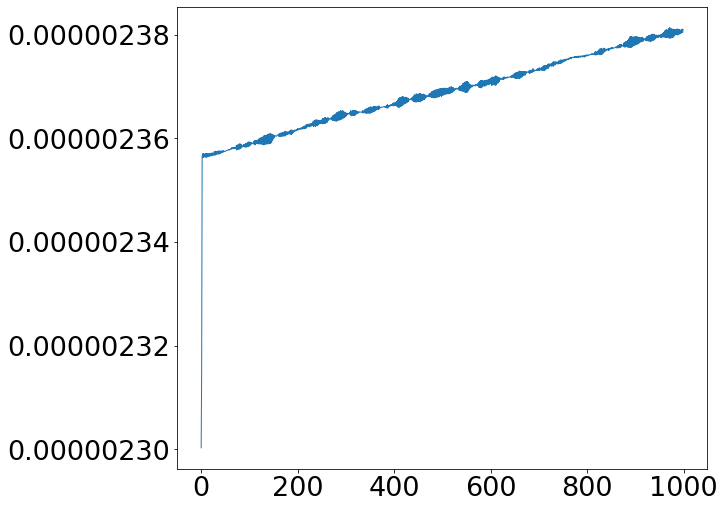

In [107]:
plt.plot(ey_mean)

In [ ]:
for var in my_variables:
    print(var)
    for my_set in range(n_sets):
        #print(var, my_set)
        temp_name = f'{var}_set{my_set}'
        

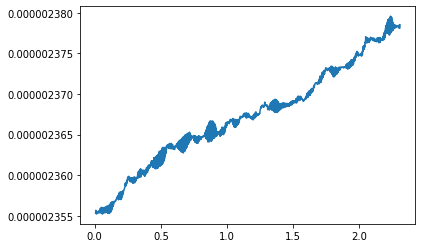

In [70]:
plt.plot(tspan[2:], ey_mean_dict[temp_name][2:])